In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
LookupTable = pd.read_csv('E:/OCR_project/Datasets/archive/c_s_v_files/Book1.csv')

LookupTable['Latin Label ']=LookupTable['Latin Label '].str.strip()
LookupTable['Arabic Label ']=LookupTable['Arabic Label '].str.strip()

In [5]:
look_dict = LookupTable.set_index('Latin Label ').T.to_dict('records')[0]

look_dict['sp'] = ' '

In [7]:
with open("E:/OCR_project/Datasets/archive/c_s_v_files/Train_cleaned.txt") as f:
    lines = f.readlines()

In [9]:
Train_Labels = pd.DataFrame(columns=['Image','Text'])
Train_Labels['Image'] = Image
Train_Labels['Text'] = Text

In [10]:
Train_Labels.to_csv('TrainLables.csv')

*For validation*

In [ ]:
with open("validation_cleaned.txt") as f:
    lines = f.readlines()

In [12]:
Image = []
Text = []
for line in lines:
    Image.append(line.split()[0])
    text = [look_dict[i] for i in line.split()[1:]]
    Text.append(''.join(text))

In [13]:
Test_Labels = pd.DataFrame(columns=['Image','Text'])
Test_Labels['Image'] = Image
Test_Labels['Text'] = Text

In [14]:
Test_Labels.to_csv('TestLabels.csv')

In [15]:
pd.read_csv('TrainLables.csv')

,Unnamed: 0,Image,Text
0,0,AHTD3A0001_Para2_3.png,من العذاب في الآخرة وأفضل ما رزقهم الله تعالى ...
1,1,AHTD3A0001_Para2_4.png,لجميع الأشياء والذي لا يقدر أحد في الدنيا على ...
2,2,AHTD3A0001_Para3_1.png,فقال له إنك في منازل آبائك وأجدادك من الجبابر...
3,3,AHTD3A0001_Para3_2.png,قبلك وشيدوه دونك وبنوا القلاع والحصون ومهدوا ا...
4,4,AHTD3A0002_Para2_1.png,وكذلك طالب الآخرة مجتهد في العمل المنجي به روح...
...,...,...,...
1395,1395,AHTD3A0438_Para2_3.png,مثل حرة القوس التي قيل إنها كانت ترى كأنها حري...
1396,1396,AHTD3A0438_Para2_4.png,التي كان يخرج منها ما يشبه البرق ويسمع منها أص...
1397,1397,AHTD3A0438_Para3_1.png,ولعل قوة نيران حرة ضروان وشدة قذفها للحمم وارت...
1398,1398,AHTD3A0438_Para3_2.png,اليمن إلى التعبد لها والتحاكم إليها فقد كانوا ...


In [ ]:
import pandas as pd

#  Step 1: Load and clean LookupTable
lookup_path = 'E:/OCR_project/Datasets/archive/c_s_v_files/Book1.csv'

# Remove extra spaces from column names and values
LookupTable = pd.read_csv(lookup_path)
LookupTable.columns = [col.strip() for col in LookupTable.columns]  # clean column names
LookupTable['Latin Label'] = LookupTable['Latin Label'].str.strip()
LookupTable['Arabic Label'] = LookupTable['Arabic Label'].str.strip()


In [13]:
#  Step 2: Create the dictionary
look_dict = dict(zip(LookupTable['Latin Label'], LookupTable['Arabic Label']))
look_dict["sp"] = " "  # Add space
look_dict["dot"] = "."
look_dict["com"] = "،"
look_dict[";"] = ""
look_dict[""] = ""

In [15]:
# ✅ Step 3: Process the train_cleaned.txt file
Image = []
Text = []

with open("E:/OCR_project/Datasets/archive/c_s_v_files/validation_cleaned.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split()
    filename = parts[0].replace("tif", "png")
    tokens = parts[1:]

    decoded = []
    for token in tokens:
        if token.isdigit():
            token = "n" + token  # Convert 1 → n1, etc.
        arabic = look_dict.get(token, "")  # Skip unknown tokens
        decoded.append(arabic)

    Image.append(filename)
    Text.append(''.join(decoded))

In [16]:
# ✅ Step 4: Save result to CSV
Train_Labels = pd.DataFrame({
    'Image': Image,
    'Text': Text
})
Train_Labels.to_csv('TrainLabels.csv', index=False, encoding='utf-8-sig')

*FOR VALIDATION*

In [ ]:

Image = []
Text = []

with open("E:/OCR_project/Datasets/archive/c_s_v_files/validation_cleaned.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split()
    filename = parts[0].replace("tif", "png")
    tokens = parts[1:]

    decoded = []
    for token in tokens:
        if token.isdigit():
            token = "n" + token  # Convert 1 → n1, etc.
        arabic = look_dict.get(token, "")  # Skip unknown tokens
        decoded.append(arabic)

    Image.append(filename)

In [21]:
import pandas as pd

# === Step 1: Load and clean the lookup table ===
lookup_path = 'E:/OCR_project/Datasets/archive/c_s_v_files/Book1.csv'
LookupTable = pd.read_csv(lookup_path)

# Clean column names and values
LookupTable.columns = [col.strip() for col in LookupTable.columns]
LookupTable['Latin Label'] = LookupTable['Latin Label'].str.strip()
LookupTable['Arabic Label'] = LookupTable['Arabic Label'].str.strip()

# Create the mapping dictionary
look_dict = dict(zip(LookupTable['Latin Label'], LookupTable['Arabic Label']))

# Add custom symbols
look_dict.update({
    "sp": " ",
    "dot": ".",
    "com": "،",
    ";": "",
    "": ""
})

# === Step 2: Load and process validate_cleaned.txt ===
Image = []
Text = []

with open("E:/OCR_project/Datasets/archive/c_s_v_files/validation_cleaned.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split()
    filename = parts[0]
    tokens = parts[1:]

    decoded = []
    for token in tokens:
        if token.isdigit():
            token = "n" + token  # Convert 1 → n1
        arabic = look_dict.get(token, "")  # Skip unknown
        decoded.append(arabic)

    Image.append(filename)
    Text.append(''.join(decoded))

# === Step 3: Save as CSV ===
Validate_Labels = pd.DataFrame({
    'Image': Image,
    'Text': Text
})
Validate_Labels.to_csv('ValidateLabels.csv', index=False, encoding='utf-8-sig')


In [22]:
pd.read_csv("ValidateLabels.csv")

,Image,Text
0,0,123456789
1,AHTD3A0001_Para1_3.jpg,طفنا وسعينا مع شيخ. كان جاري في الخيم يتكلم وه...
2,AHTD3A0001_Para1_4.jpg,مثل انقض بغلس له الضابط لزمتك. سألت راجح هل ...
3,AHTD3A0005_Para1_1.jpg,ذهب نوح مظفر ضرغام بصح ب رؤوف بن لؤي رايق ظافر...
4,AHTD3A0005_Para1_2.jpg,بدأت قوافل الحجيج حاج اثر اخر يلبي. عند وصولنا...
...,...,...
1897,AHTD3A0996_Para3_4.jpg,التي وقعها المغرب . وهكذا ، فأوراش انتقال اقتص...
1898,AHTD3A0996_Para3_5.jpg,# البني التحتي
1899,AHTD3A1002_Para3_1.jpg,وسألت أن أكتب لك عل أن الرجل أحق بيتب من الغري...
1900,AHTD3A1002_Para3_2.jpg,بالنعير والقريب أولى بانف وأن استزاد في النسل ...


In [23]:
pd.read_csv("TrainLabels.csv").head()

,Image,Text
0,0,123456789
1,AHTD3A0001_Para1_3.jpg,طفنا وسعينا مع شيخ. كان جاري في الخيم يتكلم وه...
2,AHTD3A0001_Para1_4.jpg,مثل انقض بغلس له الضابط لزمتك. سألت راجح هل ...
3,AHTD3A0005_Para1_1.jpg,ذهب نوح مظفر ضرغام بصح ب رؤوف بن لؤي رايق ظافر...
4,AHTD3A0005_Para1_2.jpg,بدأت قوافل الحجيج حاج اثر اخر يلبي. عند وصولنا...


In [24]:
tr_len = [len(k) for k in Train_Labels['Text']]

Maximum label length in the training set 109


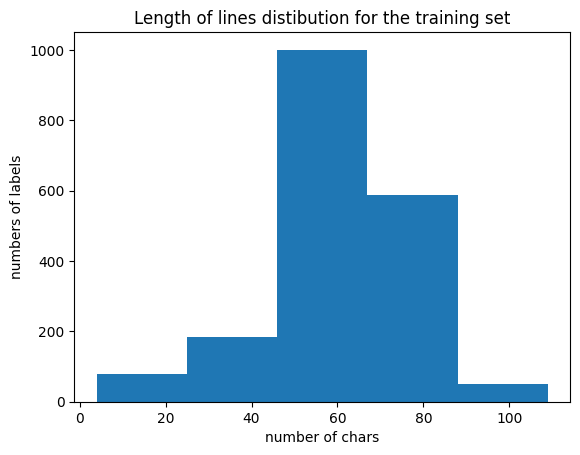

In [25]:
plt.figure()
plt.title('Length of lines distibution for the training set')
plt.xlabel('number of chars')
plt.ylabel('numbers of labels')
plt.hist(tr_len,bins=5)
# exploring the longest lines length
print('Maximum label length in the training set',str(max(tr_len)))

In [26]:
ts_len = [len(k) for k in Validate_Labels['Text']]

Maximum label length in the validate set 109


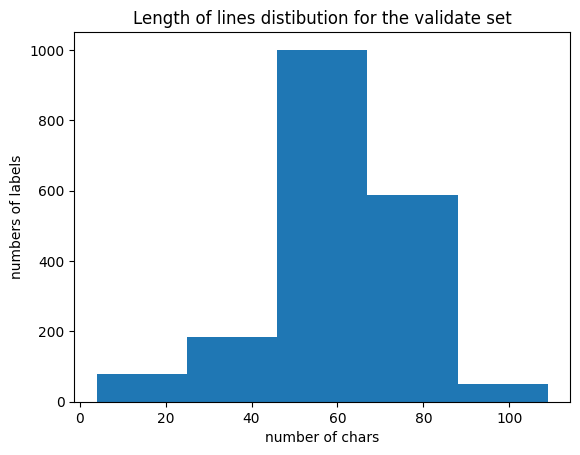

In [28]:
plt.figure()
plt.title('Length of lines distibution for the validate set')
plt.xlabel('number of chars')
plt.ylabel('numbers of labels')
plt.hist(ts_len,bins=5)


print('Maximum label length in the validate set',str(max(ts_len)))